### Import libraries

# Feature Engineering for Label 1

In [44]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

### Define string variables

In [45]:
FEATURES = []
for i in range(1, 257):
  FEATURES.append('feature_' + str(i))
  
print(FEATURES)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 

### Model to predict the label 1

In [46]:
# k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

### Import data

In [47]:
df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')

In [48]:
df_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [49]:
df_valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [50]:
df_train.shape

(28520, 260)

In [51]:
df_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,-0.225478,-0.616421,-0.212878,0.336330,0.105467,-0.339634,-0.201756,0.742262,0.942325,-1.957584,...,-0.028098,0.296340,1.724439,-1.476765,0.687445,-1.563062,30.498843,27.975107,0.799299,5.997125
std,0.990632,1.005573,1.075468,1.248919,0.831132,1.073267,0.943505,1.055721,0.940459,0.876939,...,0.989497,1.173378,0.968611,1.032811,1.028328,1.243758,17.328389,5.735913,0.400532,2.375567
min,-4.023911,-5.582544,-4.679888,-4.284380,-3.010300,-5.034355,-4.355222,-3.806574,-2.922614,-5.203347,...,-3.679602,-3.905801,-3.301683,-5.490267,-3.810144,-6.056032,1.000000,22.000000,0.000000,0.000000
25%,-0.869656,-1.287018,-0.913419,-0.478661,-0.437171,-1.075753,-0.823699,0.064072,0.298269,-2.556436,...,-0.692262,-0.550897,1.121631,-2.130906,-0.008394,-2.404028,15.000000,25.000000,1.000000,6.000000
50%,-0.190790,-0.609782,-0.218800,0.295881,0.117310,-0.329571,-0.193263,0.755193,0.940786,-1.949847,...,-0.018218,0.295523,1.783432,-1.449978,0.639575,-1.650610,30.000000,27.000000,1.000000,6.000000
75%,0.457509,0.063174,0.490262,1.119242,0.657941,0.393339,0.417146,1.461846,1.579200,-1.345999,...,0.644112,1.128566,2.383575,-0.799414,1.347263,-0.805710,46.000000,30.000000,1.000000,6.000000
max,4.322171,3.876604,4.267163,5.828656,3.884939,3.890622,3.799406,4.817545,4.615069,1.147192,...,3.915582,4.458014,5.261775,2.861117,5.531152,3.338544,60.000000,61.000000,1.000000,13.000000


In [52]:
df_valid.shape

(750, 260)

In [53]:
df_valid.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,-0.215982,-0.623504,-0.291264,0.377151,0.178972,-0.252002,-0.228841,0.771239,0.922442,-1.959988,...,-0.051848,0.342457,1.691002,-1.485593,0.691309,-1.567317,30.085333,28.330163,0.810667,6.117333
std,0.956326,1.035303,1.128986,1.244136,0.843049,1.069149,0.955363,1.074252,0.947518,0.868173,...,0.987202,1.141813,0.938246,1.051536,1.004137,1.268333,17.489060,6.518500,0.392035,2.227895
min,-3.600761,-5.998218,-3.933543,-3.788818,-2.352740,-4.067048,-3.307670,-3.230605,-2.501911,-4.732800,...,-2.942192,-2.858132,-1.695706,-4.781263,-2.499728,-5.805717,1.000000,22.000000,0.000000,0.000000
25%,-0.834711,-1.307291,-0.998405,-0.422144,-0.424725,-0.992993,-0.916115,0.110733,0.323182,-2.508483,...,-0.716455,-0.491588,1.049466,-2.149493,0.035928,-2.459352,15.000000,25.000000,1.000000,6.000000
50%,-0.205673,-0.607260,-0.307802,0.326517,0.190352,-0.196757,-0.212617,0.816087,0.910706,-1.918432,...,-0.031057,0.333020,1.772243,-1.503996,0.620206,-1.634017,29.000000,27.000000,1.000000,6.000000
75%,0.417797,0.030387,0.412266,1.156195,0.757207,0.476947,0.429078,1.482462,1.535642,-1.396017,...,0.617642,1.135099,2.372264,-0.847414,1.324276,-0.752141,45.000000,30.000000,1.000000,6.000000
max,2.302163,2.441009,3.116088,4.058463,2.861698,2.790602,3.414155,4.249192,3.708912,0.418425,...,3.356440,3.532709,3.927659,2.039558,4.018772,2.496667,60.000000,61.000000,1.000000,13.000000


In [54]:
missing_values_sum =  df_train.isnull().sum()
missing_values_sum[missing_values_sum > 0]

label_2    480
dtype: int64

Only label 2 has missing values. Does not affect for feature engineering for label 1

### Split train and validate data for features and labels

In [55]:
x_train = df_train.values[:, 0:256]
y_train = df_train.values[:, 256]

x_valid = df_valid.values[:, 0:256]
y_valid = df_valid.values[:, 256]

### Scale the data

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_valid = scaler.transform(x_valid)

In [57]:
pd.DataFrame(x_train, columns=FEATURES).describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
count,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,...,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04
mean,3.986215e-18,1.993107e-17,1.993107e-17,1.195864e-17,-1.594486e-17,-1.195864e-17,1.993107e-17,1.195864e-17,-6.377943e-17,2.391729e-17,...,-3.986215e-18,-4.982768e-17,9.566915e-17,6.975875e-17,2.391729e-17,-1.195864e-17,-7.374497e-17,-9.566915e-17,-6.377943e-17,-1.993107e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.834422e+00,-4.938687e+00,-4.153624e+00,-3.699833e+00,-3.748887e+00,-4.374312e+00,-4.402243e+00,-4.308826e+00,-4.109704e+00,-3.701305e+00,...,-4.054992e+00,-3.973555e+00,-4.256645e+00,-4.150868e+00,-3.690328e+00,-3.581297e+00,-5.189090e+00,-3.886065e+00,-4.373767e+00,-3.612478e+00
25%,-6.502805e-01,-6.668919e-01,-6.513943e-01,-6.525690e-01,-6.529014e-01,-6.858795e-01,-6.591950e-01,-6.424065e-01,-6.848443e-01,-6.829011e-01,...,-6.979189e-01,-6.740037e-01,-6.362087e-01,-6.803694e-01,-6.712256e-01,-7.220621e-01,-6.223533e-01,-6.333705e-01,-6.766814e-01,-6.761615e-01
50%,3.501709e-02,6.602356e-03,-5.506804e-03,-3.238791e-02,1.424942e-02,9.376448e-03,9.001863e-03,1.224833e-02,-1.636495e-03,8.823296e-03,...,-4.201522e-02,2.659437e-02,4.476444e-02,5.029245e-04,9.984643e-03,-6.966865e-04,6.090572e-02,2.593739e-02,-4.655127e-02,-7.039145e-02
75%,6.894582e-01,6.758403e-01,6.538103e-01,6.268827e-01,6.647358e-01,6.829483e-01,6.559725e-01,6.816160e-01,6.772076e-01,6.974210e-01,...,6.635117e-01,6.890961e-01,6.712363e-01,6.929655e-01,6.793566e-01,7.092681e-01,6.805080e-01,6.558442e-01,6.416535e-01,6.089327e-01
max,4.590737e+00,4.468203e+00,4.165740e+00,4.397741e+00,4.547456e+00,3.941547e+00,4.240817e+00,3.860258e+00,3.905338e+00,3.540530e+00,...,3.846998e+00,4.017919e+00,3.558372e+00,3.890257e+00,3.985610e+00,3.546808e+00,3.652031e+00,4.200146e+00,4.710357e+00,3.941033e+00


After scaling, mean -> 0, std -> 1

### Accuracy before feature engineering

KNN Accuracy: 0.9866666666666667


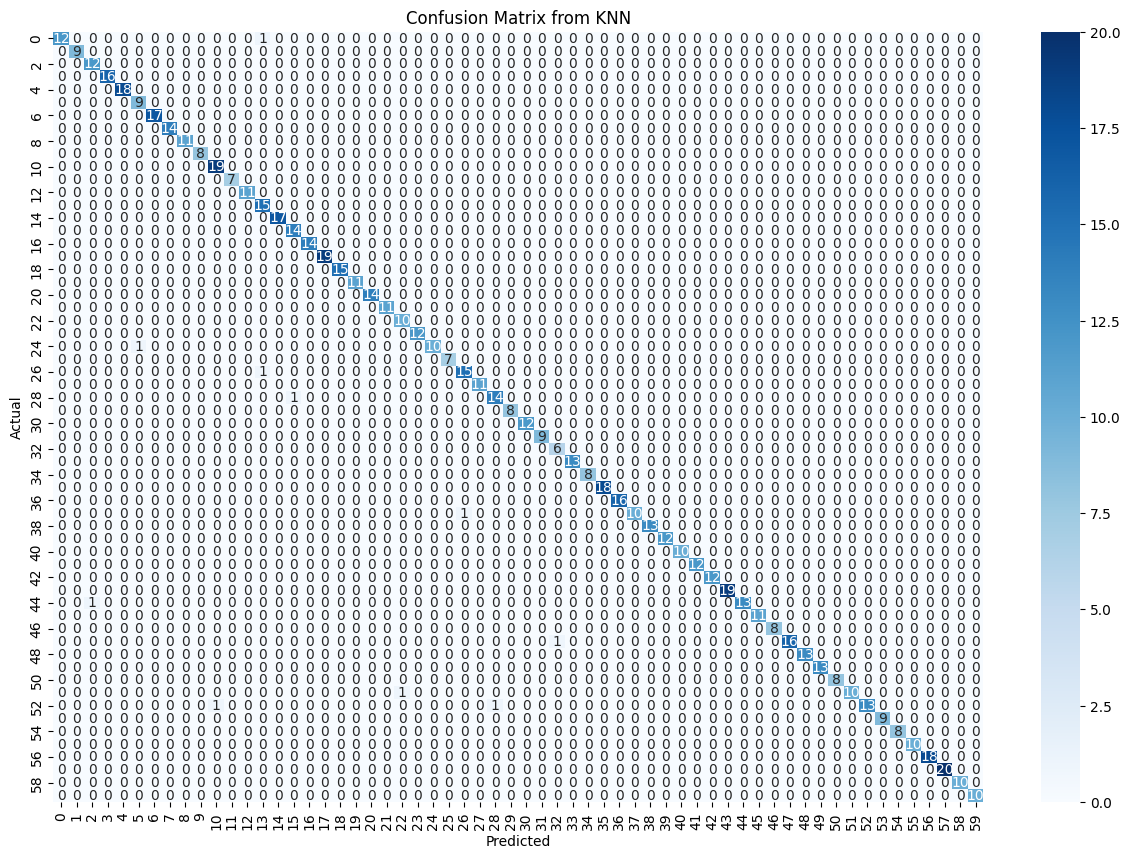

In [58]:
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_valid)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### K-Best Features selection method

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(f_classif, k=100)
x_train_kbest = k_best_selector.fit_transform(x_train, y_train)
x_train_kbest.shape

(28520, 100)

KNN Accuracy: 0.9826666666666667


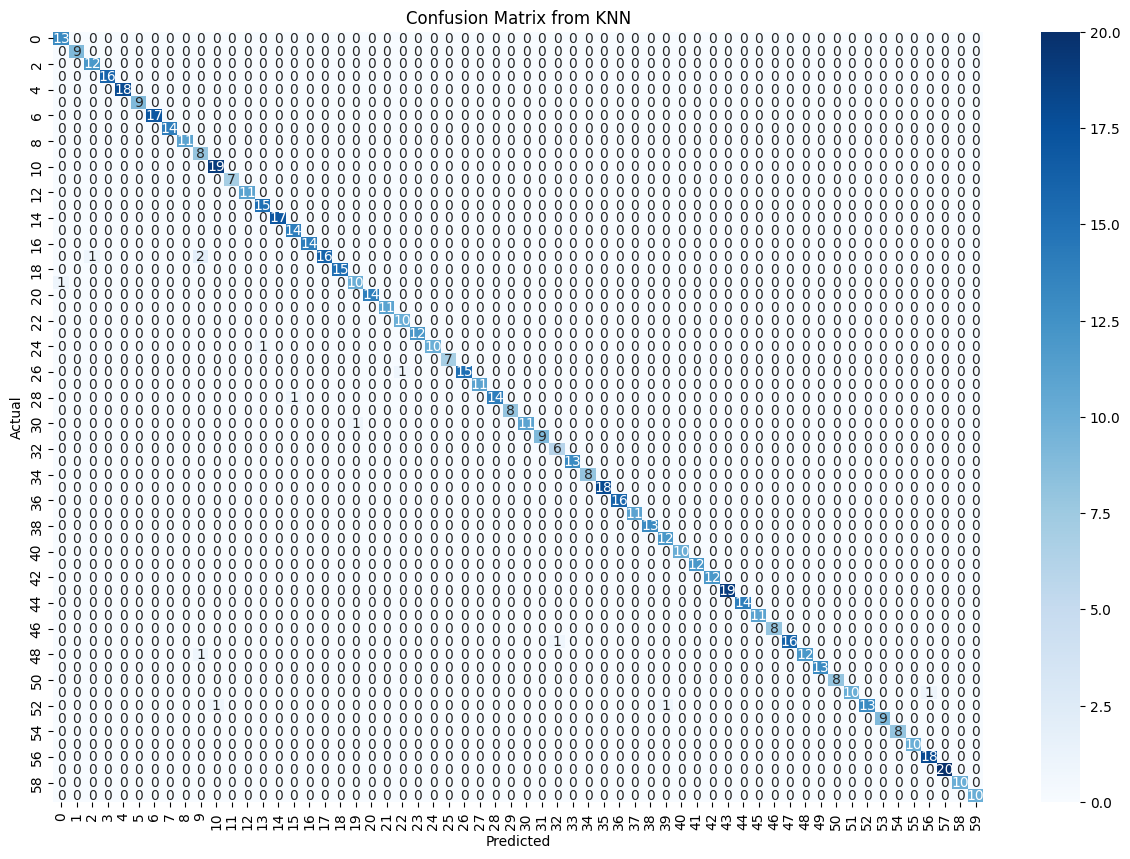

In [60]:
x_valid_kbest = k_best_selector.transform(x_valid)

knn_model.fit(x_train_kbest, y_train)
knn_predictions = knn_model.predict(x_valid_kbest)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### Best percentile Features selecetion method

In [61]:
from sklearn.feature_selection import SelectPercentile, f_classif

percentile_selector = SelectPercentile(f_classif, percentile=40)
x_train_percentile = percentile_selector.fit_transform(x_train, y_train)
x_train_percentile.shape

(28520, 102)

KNN Accuracy: 0.9813333333333333


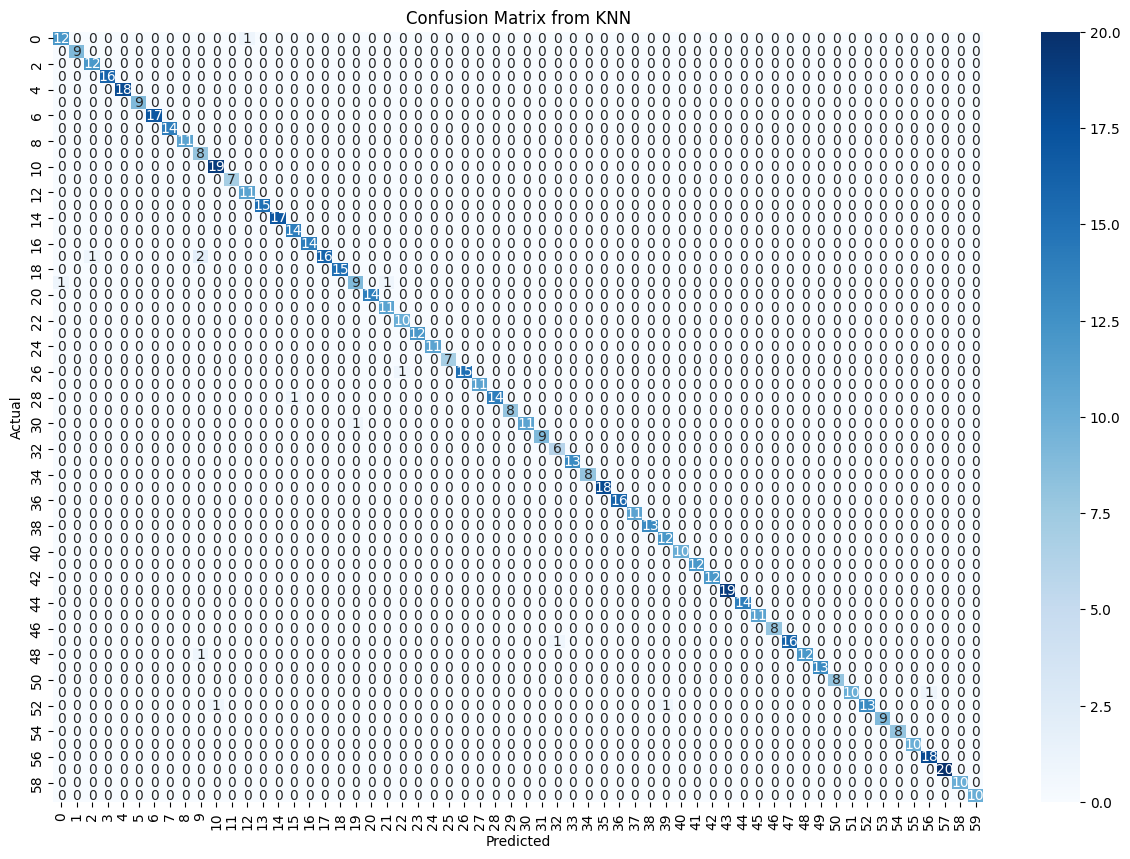

In [62]:
x_valid_percentile = percentile_selector.transform(x_valid)

knn_model.fit(x_train_percentile, y_train)
knn_predictions = knn_model.predict(x_valid_percentile)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### PCA Decomposition

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97,svd_solver='full')
x_train_pca = pca.fit_transform(x_train)
x_train_pca.shape

(28520, 80)

KNN Accuracy: 0.9866666666666667


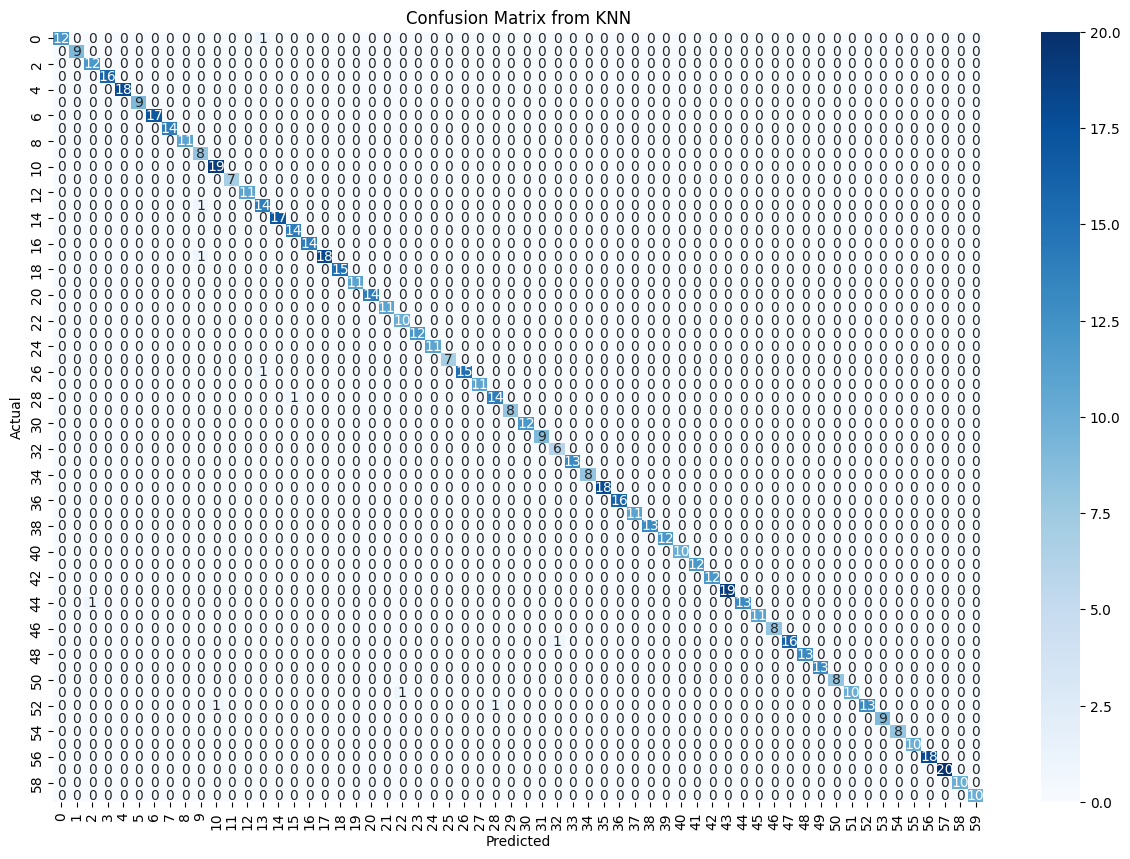

In [64]:
x_valid_pca = pca.transform(x_valid)

knn_model.fit(x_train_pca, y_train)
knn_predictions = knn_model.predict(x_valid_pca)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### Combine K-Best and PCA

In [65]:
pca_for_kbest = PCA(n_components=0.99)
x_train_pca_with_kbest = pca_for_kbest.fit_transform(x_train_kbest)
x_train_pca_with_kbest.shape

(28520, 73)

KNN Accuracy: 0.9813333333333333


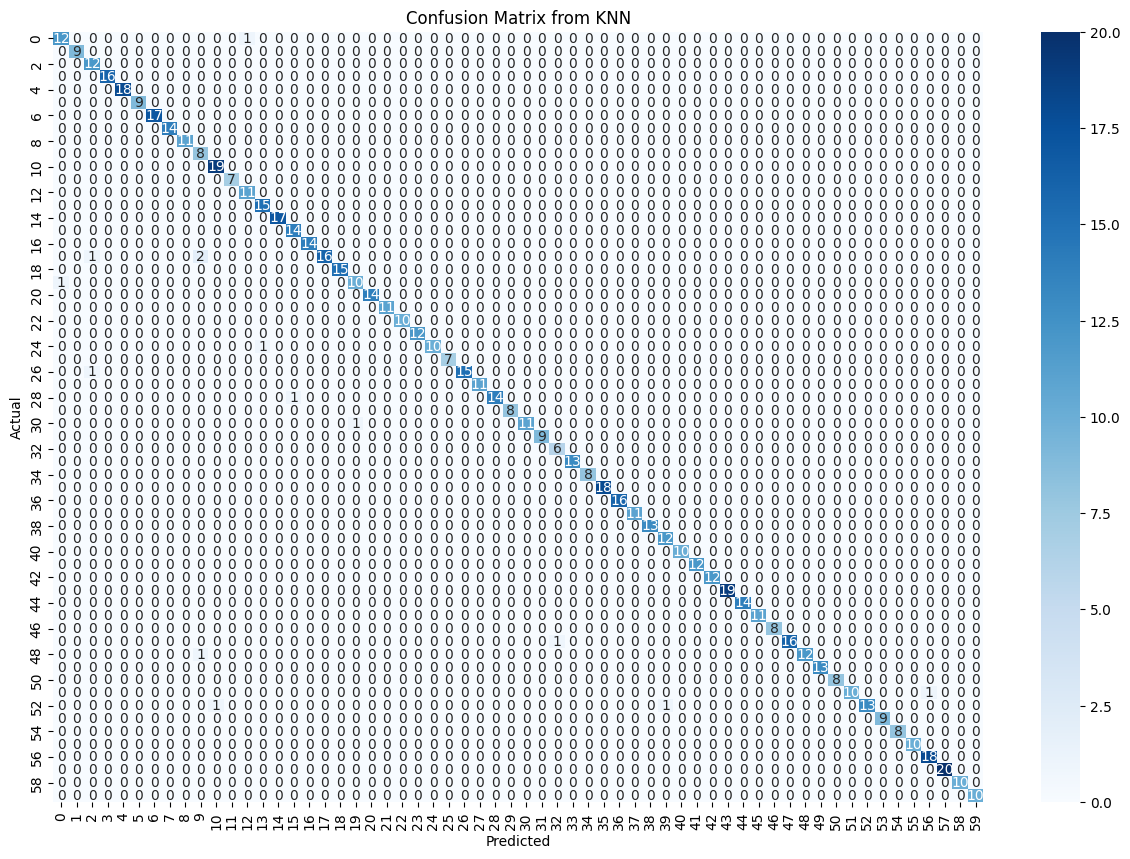

In [66]:
x_valid_pca_with_kbest = pca_for_kbest.transform(x_valid_kbest)

knn_model.fit(x_train_pca_with_kbest, y_train)
knn_predictions = knn_model.predict(x_valid_pca_with_kbest)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### Add Percentile selection for K-best and PCA

In [67]:
percentile_selector_for_kbest_and_pca = SelectPercentile(f_classif, percentile=80)
x_train_percentile_for_pca_with_kbest = percentile_selector_for_kbest_and_pca.fit_transform(x_train_pca_with_kbest, y_train)
x_train_percentile_for_pca_with_kbest.shape

(28520, 58)

KNN Accuracy: 0.9786666666666667


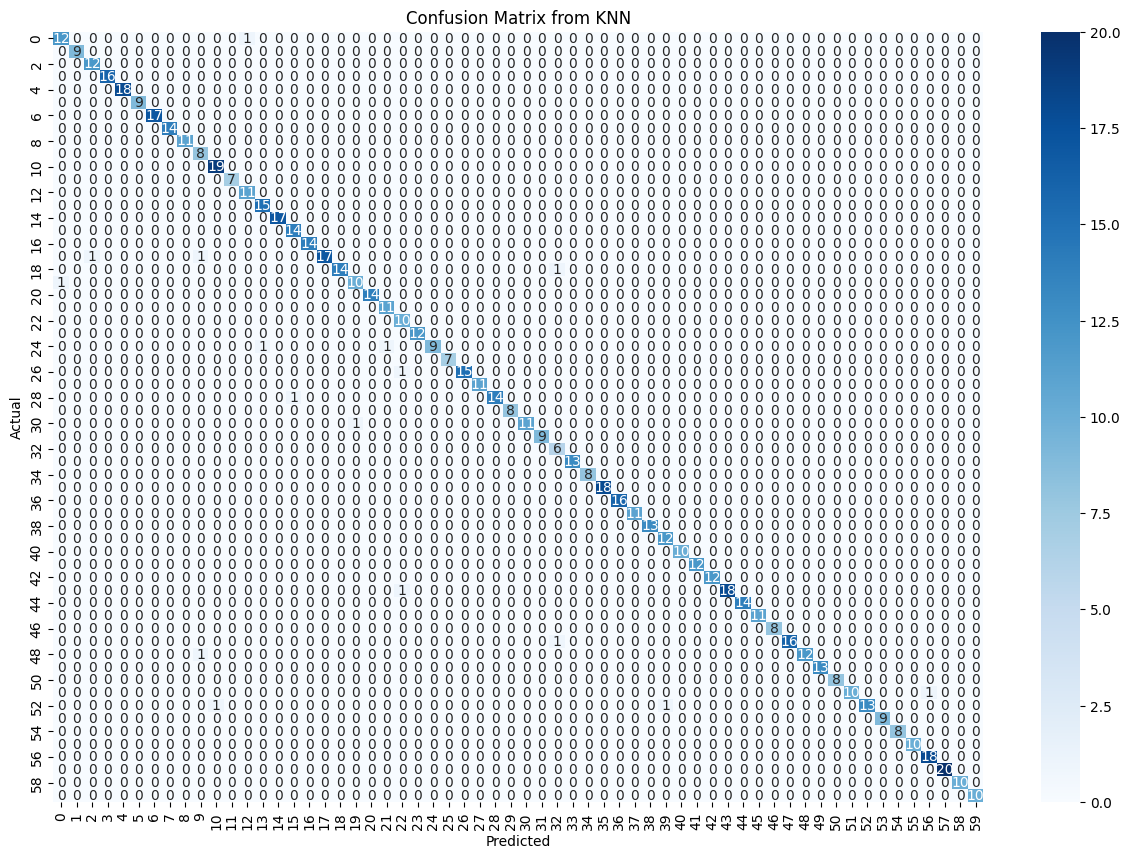

In [68]:
x_valid_percentile_for_pca_with_kbest = percentile_selector_for_kbest_and_pca.transform(x_valid_pca_with_kbest)

knn_model.fit(x_train_percentile_for_pca_with_kbest, y_train)
knn_predictions = knn_model.predict(x_valid_percentile_for_pca_with_kbest)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
knn_conf_matrix = confusion_matrix(y_valid, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

plt.figure(figsize=(15, 10))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix from KNN")
plt.show()

### Read the test.csv file, transform its features and save the transformed features in a new file

In [70]:
df_test = pd.read_csv('test.csv')
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,,,,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,,,,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,,,,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,,,,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,,,,NaN


In [71]:
missing_values_sum =  df_test.isnull().sum()
missing_values_sum[missing_values_sum > 0]

label_4    750
dtype: int64

In [72]:
x_test = df_test.values[:, 0:256]
x_test = scaler.transform(x_test)

x_test_kbest = k_best_selector.transform(x_test)
x_test_pca_with_kbest = pca_for_kbest.transform(x_test_kbest)
x_test_percentile_for_pca_with_kbest = percentile_selector_for_kbest_and_pca.transform(x_test_pca_with_kbest)

### Prediction before feature engineering

In [73]:
knn_model.fit(x_train, y_train)
knn_predictions_before = knn_model.predict(x_test)

knn_predictions_before

array([45., 45., 45., 45., 45., 45.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5., 60., 60., 60., 60., 60., 60., 60., 26.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 31.,
       19., 19., 19., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 46., 46., 46.,
       46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46.,
       46., 46., 46., 46., 51., 31., 51., 51., 51., 51., 51., 51., 51.,
       51., 51., 51., 51., 51., 51., 51., 51., 35., 35., 35., 35., 35.,
       35., 35., 35., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56.,
       56., 53., 53., 53., 53., 53., 53., 53., 11., 53., 53.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 43., 43., 43.,
       43., 43., 43., 43., 43., 43., 43., 43., 58., 58., 58., 58

### Prediction after feature engineering

In [74]:
knn_model.fit(x_train_percentile_for_pca_with_kbest, y_train)
knn_predictions_after = knn_model.predict(x_test_percentile_for_pca_with_kbest)

knn_predictions_after

array([45., 45., 45., 45., 45.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5., 60., 60., 60., 60., 60., 60., 60., 60.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 31.,
       19., 19., 19., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 46., 46., 46.,
       46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46.,
       46., 46., 46., 46., 51., 31., 51., 51., 51., 51., 51., 51., 51.,
       51., 51., 51., 51., 51., 51., 51., 51., 35., 35., 35., 35., 35.,
       35., 35., 35., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56.,
       56., 53., 53., 53., 53., 53., 53., 53., 11., 53., 53.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40.,  6., 40., 40., 40., 40., 43., 43., 43.,
       43., 43., 43., 43., 43., 43., 43., 43., 58., 58., 58., 58

In [75]:
df_for_csv = pd.DataFrame()
df_for_csv['Predicted labels before feature engineering'] = knn_predictions_before
df_for_csv['Predicted labels after feature engineering'] = knn_predictions_after
df_for_csv['No of new features'] = x_test_percentile_for_pca_with_kbest.shape[1]

for i in range(x_test.shape[1]):
    df_for_csv[f'new_feature_{i+1}'] = x_test_percentile_for_pca_with_kbest[:, i] if i < x_test_percentile_for_pca_with_kbest.shape[1] else pd.NA

df_for_csv.head()

/tmp/ipykernel_217326/1215817778.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_for_csv[f'new_feature_{i+1}'] = x_test_percentile_for_pca_with_kbest[:, i] if i < x_test_percentile_for_pca_with_kbest.shape[1] else pd.NA
/tmp/ipykernel_217326/1215817778.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_for_csv[f'new_feature_{i+1}'] = x_test_percentile_for_pca_with_kbest[:, i] if i < x_test_percentile_for_pca_with_kbest.shape[1] else pd.NA
/tmp/ipykernel_217326/1215817778.py:7: PerformanceWarning: DataFrame is highly f

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,45.0,45.0,58,4.425756,1.198600,-0.805743,1.693191,-4.698194,-1.639499,4.099717,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,45.0,45.0,58,8.140603,4.769097,-2.567863,3.255575,-4.814205,-2.944788,2.296473,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,45.0,45.0,58,3.655356,1.263475,-2.421457,1.834458,-2.796923,-1.313600,1.611714,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,45.0,45.0,58,5.430490,2.707075,0.823854,-1.209821,-1.098287,-2.015837,2.405467,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,45.0,45.0,58,4.728250,1.917067,0.422136,3.380174,-2.838464,0.369249,3.299818,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [76]:
df_for_csv.to_csv('190239A_label1.csv', index=False)